In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from joblib import load
import sys
import os

In [41]:
from helpers.data_preprocessing import *

In [42]:
data = load_and_preprocess_data("Dataset/cic-ids_dataset.csv")
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,9392887,4,0,24,0,6,6,6.000000,0.000000,...,20,1.982000e+03,0.0000,1982,1982,9390905.0,0.0000,9390905,9390905,DDoS
1,64007,5438011,1,5,6,30,6,6,6.000000,0.000000,...,20,2.715100e+04,0.0000,27151,27151,5410860.0,0.0000,5410860,5410860,BENIGN
2,80,115615609,20,15,1728,3463,578,0,86.400000,211.017934,...,32,1.609163e+05,134508.6864,566475,120118,10100000.0,46752.4843,10100000,9988018,BENIGN
3,80,9827,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,DDoS
4,53315,87583370,7,9,11607,62,4380,0,1658.142857,1762.272815,...,20,4.219842e+06,0.0000,4219842,4219842,82600000.0,0.0000,82600000,82600000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19410,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,32,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed
19411,444,119297996,2782,2089,9368,7882432,1448,0,3.367362,30.505030,...,32,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed
19412,444,119257653,2802,2067,20858,7812389,5792,0,7.443969,126.045811,...,32,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed
19413,444,119260295,2791,2114,13712,7878088,5792,0,4.912934,110.396187,...,32,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed


In [43]:
count = data['Label'].value_counts()
count

Label
BENIGN                      9505
DoS Hulk                    2302
PortScan                    1632
DDoS                        1305
DoS GoldenEye               1029
FTP-Patator                  794
SSH-Patator                  590
DoS slowloris                580
DoS Slowhttptest             550
Web Attack Brute Force       452
Bot                          389
Web Attack XSS               196
Infiltration                  36
Web Attack Sql Injection      21
Heartbleed                    11
Name: count, dtype: int64

In [44]:
data, encoder = encode_labels(data)
encoder.classes_.tolist()

['BENIGN',
 'Bot',
 'DDoS',
 'DoS GoldenEye',
 'DoS Hulk',
 'DoS Slowhttptest',
 'DoS slowloris',
 'FTP-Patator',
 'Heartbleed',
 'Infiltration',
 'PortScan',
 'SSH-Patator',
 'Web Attack Brute Force',
 'Web Attack Sql Injection',
 'Web Attack XSS']

In [45]:
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Encoded_Label
0,80,9392887,4,0,24,0,6,6,6.000000,0.000000,...,1.982000e+03,0.0000,1982,1982,9390905.0,0.0000,9390905,9390905,DDoS,2
1,64007,5438011,1,5,6,30,6,6,6.000000,0.000000,...,2.715100e+04,0.0000,27151,27151,5410860.0,0.0000,5410860,5410860,BENIGN,0
2,80,115615609,20,15,1728,3463,578,0,86.400000,211.017934,...,1.609163e+05,134508.6864,566475,120118,10100000.0,46752.4843,10100000,9988018,BENIGN,0
3,80,9827,3,5,26,11601,20,0,8.666667,10.263203,...,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,DDoS,2
4,53315,87583370,7,9,11607,62,4380,0,1658.142857,1762.272815,...,4.219842e+06,0.0000,4219842,4219842,82600000.0,0.0000,82600000,82600000,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19410,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed,8
19411,444,119297996,2782,2089,9368,7882432,1448,0,3.367362,30.505030,...,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed,8
19412,444,119257653,2802,2067,20858,7812389,5792,0,7.443969,126.045811,...,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed,8
19413,444,119260295,2791,2114,13712,7878088,5792,0,4.912934,110.396187,...,0.000000e+00,0.0000,0,0,0.0,0.0000,0,0,Heartbleed,8


In [46]:
# Split data
X_train, X_test, y_train, y_test, X, y = split_data(data)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (15513, 78), Testing data: (3879, 78)


In [47]:
# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:

dump(model, "models/rf_model.joblib")

['models/rf_model.joblib']

In [49]:
# model = load('models/rf_model.joblib')

In [50]:
y_pred = model.predict(X_test)
y_pred

array([ 0,  0,  2, ..., 10, 10,  2], shape=(3879,))

In [51]:
# Print classification report with weighted F1-Score
print("Classification Report:")
report = classification_report(y_test, y_pred, target_names=encoder.classes_, output_dict=True)
print(classification_report(y_test, y_pred, target_names=encoder.classes_))
weighted_f1_score = report['weighted avg']['f1-score']
print(f"Weighted F1-Score: {weighted_f1_score:.2f}")

Classification Report:
                          precision    recall  f1-score   support

                  BENIGN       0.99      1.00      1.00      1894
                     Bot       0.97      0.93      0.95        70
                    DDoS       1.00      1.00      1.00       246
           DoS GoldenEye       0.99      0.99      0.99       197
                DoS Hulk       1.00      1.00      1.00       455
        DoS Slowhttptest       0.97      0.97      0.97       112
           DoS slowloris       0.99      0.99      0.99       114
             FTP-Patator       0.99      0.99      0.99       176
              Heartbleed       1.00      1.00      1.00         3
            Infiltration       1.00      0.80      0.89         5
                PortScan       1.00      1.00      1.00       341
             SSH-Patator       1.00      0.99      1.00       130
  Web Attack Brute Force       0.75      0.70      0.72        97
Web Attack Sql Injection       0.75      0.50      0

In [52]:
predicted_attack_types = encoder.inverse_transform(y_pred)
pd.Series(predicted_attack_types).value_counts()

BENIGN                      1898
DoS Hulk                     455
PortScan                     342
DDoS                         246
DoS GoldenEye                198
FTP-Patator                  177
SSH-Patator                  129
DoS slowloris                114
DoS Slowhttptest             112
Web Attack Brute Force        91
Bot                           67
Web Attack XSS                39
Infiltration                   4
Web Attack Sql Injection       4
Heartbleed                     3
Name: count, dtype: int64

In [53]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1888    2    0    0    1    1    0    1    0    0    1    0    0    0
     0]
 [   5   65    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0  246    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0  196    0    1    0    0    0    0    0    0    0    0
     0]
 [   1    0    0    0  454    0    0    0    0    0    0    0    0    0
     0]
 [   2    0    0    0    0  109    0    0    0    0    0    0    1    0
     0]
 [   0    0    0    0    0    1  113    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    1  175    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    3    0    0    0    0    0
     0]
 [   1    0    0    0    0    0    0    0    0    4    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  341    0    0    0
     0]
 [   0    0    0    0    0    0    0    1    0    0    0  129    0    0
     0]
 [   0    0    0    0    0    0    0    

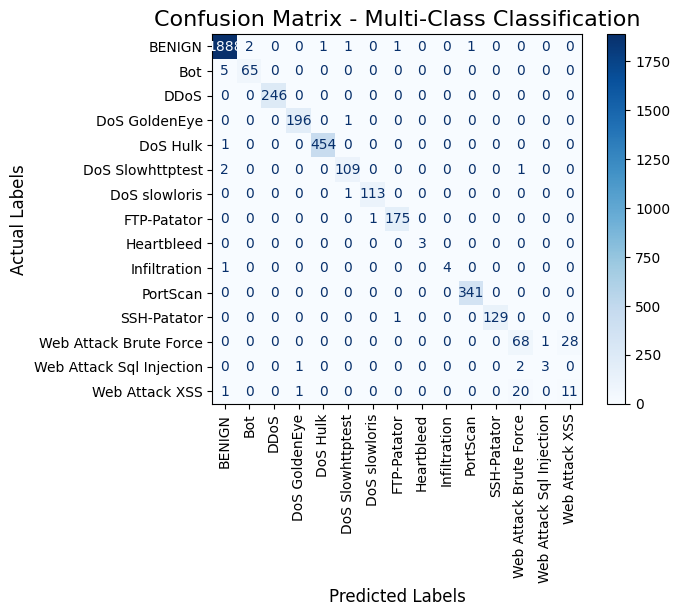

In [54]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay with all class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

# Plot the confusion matrix
disp.plot(cmap="Blues", values_format="d", colorbar=True)


# Add title and labels
plt.title("Confusion Matrix - Multi-Class Classification", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)

# Adjust tick marks to display class names
plt.xticks(ticks=range(len(encoder.classes_)), labels=encoder.classes_, rotation=90, fontsize=10)
plt.yticks(ticks=range(len(encoder.classes_)), labels=encoder.classes_, fontsize=10)

# Show the plot
plt.show()


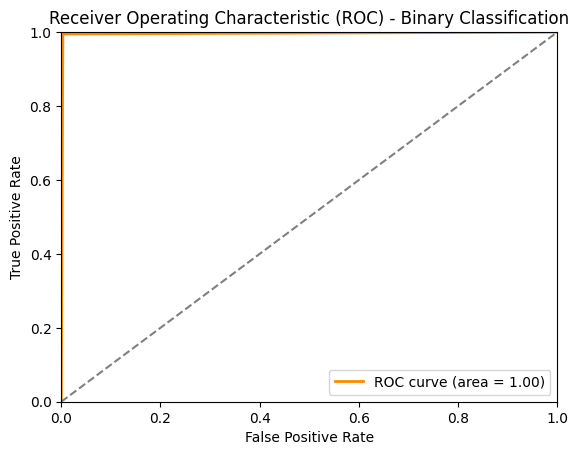

In [55]:
# Compute AUC-ROC for binary classification (benign vs. attack)
y_test_binary = (y_test != encoder.transform(['BENIGN'])[0]).astype(int)
y_pred_binary = (y_pred != encoder.transform(['BENIGN'])[0]).astype(int)
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Binary Classification')
plt.legend(loc="lower right")
plt.show()

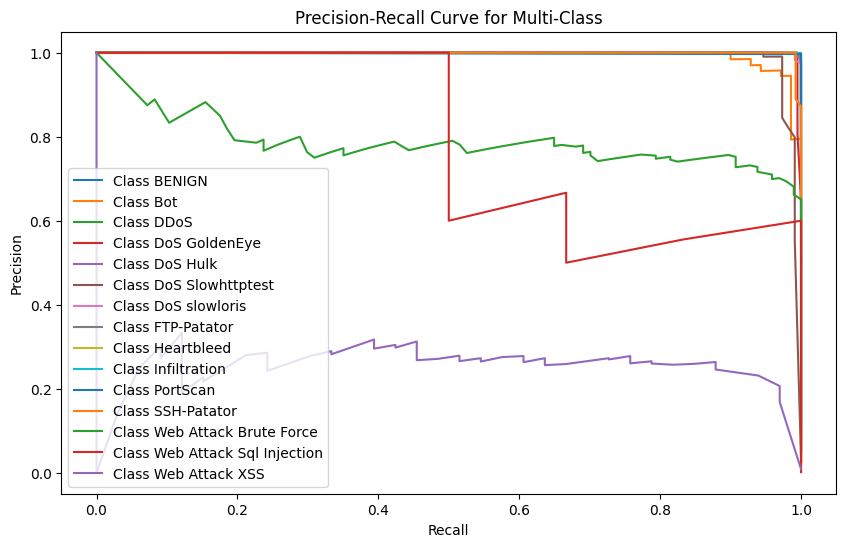

In [56]:
# Binarize the multi-class labels for one-vs-rest precision-recall calculation
y_test_binarized = label_binarize(y_test, classes=range(len(encoder.classes_)))  # Adjust to number of classes

plt.figure(figsize=(10, 6))

# Compute Precision-Recall curve for each class
for i, class_name in enumerate(encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, label=f"Class {class_name}")

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class")
plt.legend(loc="best")
plt.show()

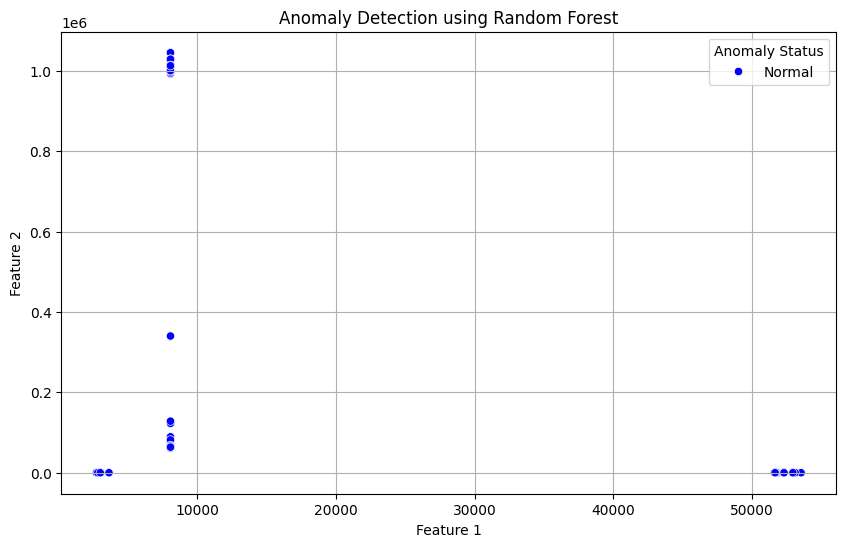

In [57]:
X_test['anomaly'] = y_pred
X_test['anomaly'] = X_test['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test, x=X_test.columns[0], y=X_test.columns[1], hue='anomaly', style='anomaly', palette={'Normal': 'blue', 'Anomaly': 'red'}, markers={'Normal': 'o', 'Anomaly': 'X'})
plt.title('Anomaly Detection using Random Forest')
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.legend(title='Anomaly Status')
plt.grid()
plt.show()

In [58]:
new_data = load_and_preprocess_data("Dataset for Test/sampled_dataset.csv")

In [59]:
new_data['Label'].value_counts()

Label
BENIGN                        590245
DoS Hulk                       59804
PortScan                       41421
DDoS                           33500
DoS GoldenEye                   2645
FTP-Patator                     2076
SSH-Patator                     1577
DoS slowloris                   1460
DoS Slowhttptest                1436
Bot                              498
Web Attack � Brute Force         406
Web Attack � XSS                 179
Infiltration                       9
Web Attack � Sql Injection         6
Heartbleed                         3
Name: count, dtype: int64

In [60]:
# Encode the labels
new_data, encoder_n = encode_labels(new_data)

In [61]:
# Split the data into training and testing sets
X_train_n, X_test_n, y_train_n, y_test_n, X_n, y_n = split_data(new_data)

In [62]:
X_test_n.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
639147,53326,53,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
665259,443,198800,9,8,526,4166,198,0,58.444444,79.542616,...,8,20,0.0,0.0,0,0,0.0,0.0,0,0
398524,443,146436,25,31,914,41428,214,0,36.560000,63.768514,...,24,20,0.0,0.0,0,0,0.0,0.0,0,0
682885,80,145504,3,6,379,11595,379,0,126.333333,218.815752,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
240797,53,455,1,1,47,128,47,47,47.000000,0.000000,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0


In [63]:
y_pred_n = model.predict(X_test_n)

In [64]:
y_pred_n

array([0, 0, 0, ..., 0, 0, 0], shape=(147053,))

In [65]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test_n, y_pred_n, labels=np.arange(len(encoder.classes_)), target_names=encoder_n.classes_))

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    118123
                       Bot       0.51      0.99      0.67        91
                      DDoS       1.00      1.00      1.00      6685
             DoS GoldenEye       0.93      1.00      0.96       514
                  DoS Hulk       0.99      1.00      0.99     11862
          DoS Slowhttptest       0.89      0.99      0.93       306
             DoS slowloris       0.99      0.99      0.99       291
               FTP-Patator       0.95      1.00      0.97       394
                Heartbleed       0.00      0.00      0.00         0
              Infiltration       0.00      0.00      0.00         0
                  PortScan       0.99      1.00      1.00      8330
               SSH-Patator       0.98      0.99      0.99       346
  Web Attack � Brute Force       0.78      0.71      0.74        79
Web Attack � Sql Injecti

C:\Users\nazib\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nazib\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nazib\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
# Map predicted labels to class names (if you used LabelEncoder)
predicted_attack_types = encoder_n.inverse_transform(y_pred_n)

In [67]:
# Add predictions to the new dataset
pd.Series(predicted_attack_types).value_counts()

BENIGN                        117781
DoS Hulk                       11989
PortScan                        8350
DDoS                            6685
DoS GoldenEye                    549
FTP-Patator                      413
SSH-Patator                      350
DoS Slowhttptest                 340
DoS slowloris                    291
Bot                              176
Web Attack � Brute Force          72
Web Attack � XSS                  46
Infiltration                       8
Web Attack � Sql Injection         2
Heartbleed                         1
Name: count, dtype: int64